In [1]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir(os.path.join('..', '..', 'notebook_format'))
from formats import load_style
load_style(css_style = 'custom2.css')

In [2]:
os.chdir(path)

# Data Science is Software

Developer #lifehacks forr Data Scientist.

## Section 1:  Environment Reproducibility

### [watermark](https://github.com/rasbt/watermark) extension

Tell everyone when you ran the notebook, and packages' version that you're currently using. Listing these information at the top of a notebook is especially useful for nbviewer, blog posts and other media where you are not sharing the notebook as executable code.

In [3]:
# once it is installed, you'll just need this in future notebooks:
%load_ext watermark
%watermark -a "Ethen" -d -t -v -p numpy,pandas,seaborn,watermark,matplotlib

Ethen 2017-10-10 17:57:55 

CPython 3.5.2
IPython 6.1.0

numpy 1.13.3
pandas 0.20.3
seaborn 0.7.1
watermark 1.4.0
matplotlib 2.0.0


### Create A Separate Environment

Continuum's `conda` tool provides a way to create [isolated environments](http://conda.pydata.org/docs/using/envs.html). The `conda env` functionality let's you created an isolated environment on your machine, that way we can 

- Start from "scratch" on each project
- Choose Python 2 or 3 as appropriate

To create an empty environment:

- `conda create -n <name> python=3`

**Note: `python=2` will create a Python 2 environment; `python=3` will create a Python 3 environment.**

To work in a particular virtual environment:

- `source activate <name>`
 
To leave a virtual environment:

- `source deactivate`

**Note: on Windows, the commands are just `activate` and `deactivate`, no need to type `source`.**

There are other Python tools for environment isolation, but none of them are perfect. If you're interested in the other options, [`virtualenv`](https://virtualenv.pypa.io/en/stable/) and [`pyenv`](https://github.com/yyuu/pyenv) both provide environment isolation. There are _sometimes_ compatibility issues between the Anaconda Python distribution and these packages, so if you've got Anaconda on your machine you can use `conda env` to create and manage environments.

<p>
<div class="alert alert-info">

Create a new environment for every project you work on

</div>

### The pip [requirements.txt](https://pip.readthedocs.org/en/1.1/requirements.html) file

It's a convention in the Python ecosystem to track a project's dependencies in a file called `requirements.txt`. We recommend using this file to keep track of your MRE, "Minimum reproducible environment". An example of `requirements.txt` might look something like the following:

```text
pandas>=0.19.2
matplotlib>=2.0.0
```

The format for a line in the requirements file is:

 | Syntax | Result |
 | --- | --- |
 | `package_name` | for whatever the latest version on PyPI is |
 | `package_name==X.X.X` | for an exact match of version X.X.X |
 | `package_name>=X.X.X` | for at least version X.X.X |
 
Now, contributors can create a new virtual environment (using conda or any other tool) and install your dependencies just by running:

`pip install -r requirements.txt`
 
<p>
<div class="alert alert-info">
Never again run `pip install [package]`. Instead, update `requirements.txt` and run `pip install -r requirements.txt`. And for data science projects, favor `package>=0.0.0` rather than `package==0.0.0`, this prevents you from having many versions of large packages (e.g. numpy, scipy, pandas) with complex dependencies sitting around
</div>

Usually the package version will adhere to [semantic versioning](http://semver.org/). Let’s take 0.19.2 as an example and break down what each number represents.

- (**0**.19.2) The first number in this chain is called the major version.
- (0.**19**.2) The second number is called the minor version.
- (0.19.**2**) The third number is called the patch version.

These versions are incremented when code changes are introduced. Depending on the nature of the change, a different number is incremented.

- The major version (first number) is incremented when there's backwards incompatible changes, i.e. changes that break the old API are released. Usually, when major versions are released there’s a guide released with how to update from the old version to the new one
- The minor version (second number) is incremented when backwards compatible changes. Functionality is added (or speed improvements) that does not break any existing functionality, at least the public API that end-users would use
- The patch version (third number) is for backwards compatible bug fixes. Bug fixes are in contrast here with features (adding functionality). These patches go out when something is wrong with existing functionality or when improvements to existing functionality are implemented

### Separation of configuration from codebase

There are some things you don't want to be openly reproducible: your private database url, your AWS credentials for downloading the data, your SSN, which you decided to use as a hash. These shouldn't live in source control, but may be essential for collaborators or others reproducing your work.

This is a situation where we can learn from some software engineering best practices. The [12-factor app principles](http://12factor.net/) give a set of best-practices for building web applications. Many of these principles are relevant for best practices in the data-science codebases as well.

Using a dependency manifest like `requirements.txt` satisfies [II. Explicitly declare and isolate dependencies](http://12factor.net/dependencies). Another important principle is [III. Store config in the environment](http://12factor.net/config):

 > An app’s config is everything that is likely to vary between deploys (staging, production, developer environments, etc). Apps sometimes store config as constants in the code. This is a violation of twelve-factor, which requires strict separation of config from code. Config varies substantially across deploys, code does not. A litmus test for whether an app has all config correctly factored out of the code is whether the codebase could be made open source at any moment, without compromising any credentials.
 
The [`dotenv` package](https://github.com/theskumar/python-dotenv) allows you to easily store these variables in a file that is not in source control (as long as you keep the line `.env` in your `.gitignore` file!). You can then reference these variables as environment variables in your application with `os.environ.get('VARIABLE_NAME')`.

In [4]:
import os
from dotenv import load_dotenv

In [5]:
# load the .env file
load_dotenv('.env')

In [6]:
# obtain the value of the variable
os.environ.get('FOO')

Note that I've personally enjoy using [configparser](https://docs.python.org/3/library/configparser.html) more.

## Section 2:  Writing code for reusability

If the code prints out some output and we want the reader to see it within some context (e.g. presenting a data story), then jupyter notebook it a ideal place for it to live. However, we wish to use the same piece of code in multiple notebooks then we should save it to a standalone `.py` file to prevent copying and pasting the same piece of code every single time. Finally, if the code is going to used in multiple data analysis project then we should consider creating a package for it.

In [7]:
# 1. magic for inline plot
# 3. magic so that the notebook will reload external python modules
# 4. a ipython magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### No more docs-guessing

Don't edit-run-repeat to try to remember the name of a function or argument. Jupyter provides great docs integration and easy ways to remember the arguments to a function.

> To check the doc, we can simply add a question mark `?` after the method, or press `Shift Tab` (press both at the same time) inside the bracket of the method and it will print out argument to the method. Also the `Tab` key can be used for auto-completion of methods and arguments for a method.

Consider the following example:

In [8]:
pump_data_path = os.path.join('..', 'data', 'raw', 'pumps_train_values.csv')
df = pd.read_csv(pump_data_path)
df.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


After reading in the data, we discovered that the data provides an `id` column and we wish to change it to the index column. But we forgot the parameter to do so.

In [9]:
# we can do ?pd.read_csv or just check the 
# documentation online since it usually looks nicer ...
df = pd.read_csv(pump_data_path, index_col = 0)
df.head(1)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### No more copying-pasting

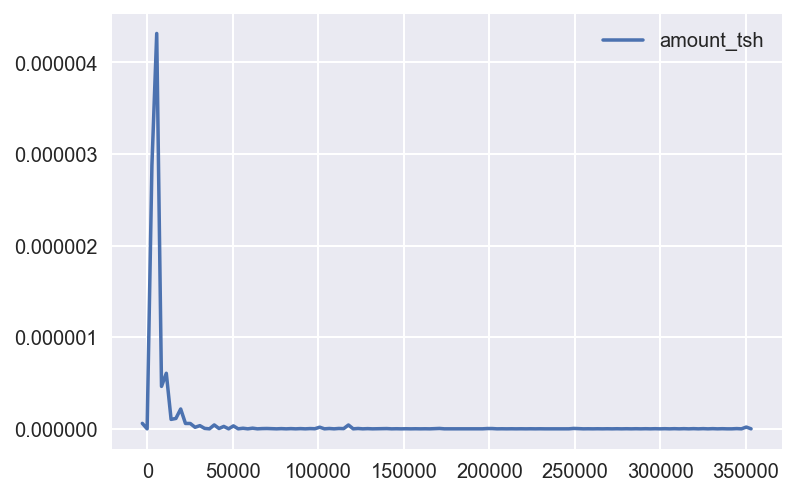

In [10]:
# create a chart, and we might be tempted to
# paste the code for 'construction_year'
# paste the code for 'gps_height'
plot_data = df['amount_tsh']
sns.kdeplot(plot_data, bw = 1000)
plt.show()

After making this plot, we might want to do the same for other numeric variables. Don't repeat yourself, create a function to do it instead of copying and pasting. And for the function write appropriate [docstrings](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html#example-numpy).

In [11]:
def kde_plot(dataframe, variable, upper = None, lower = None, bw = 0.1):
    """ 
    Plots a density plot for a variable with optional upper and
    lower bounds on the data (inclusive)
    
    Parameters
    ----------
    dataframe : DataFrame
    
    variable : str
        input column, must exist in the input dataframe
        
    upper : int
        upper bound for the input column, i.e. data points
        exceeding this threshold will be excluded
    
    lower : int
        lower bound for the input column, i.e. data points
        below this threshold will be excluded
    
    bw : float, default 0.1
        bandwidth for density plot's line
    
    References
    ----------
    Numpy style docstring
    - http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html#example-numpy
    """
    plot_data = dataframe[variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]

    sns.kdeplot(plot_data, bw = bw)
    plt.show()

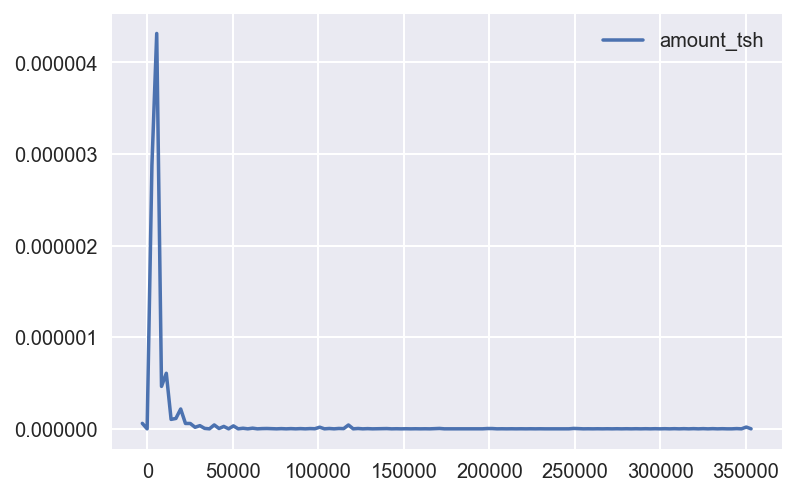

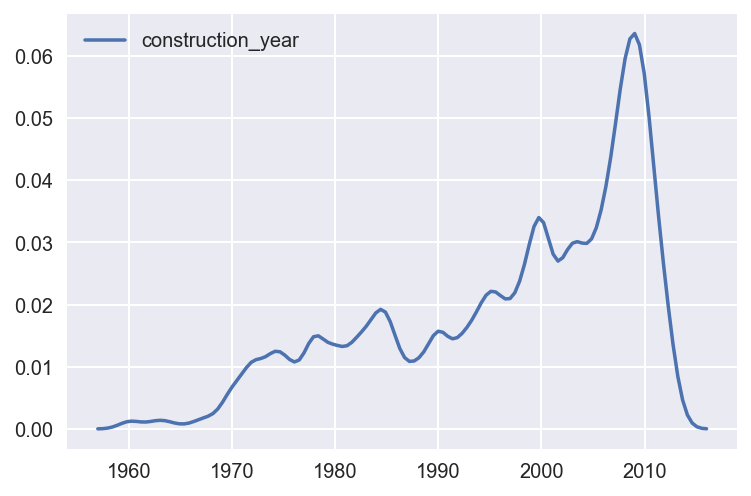

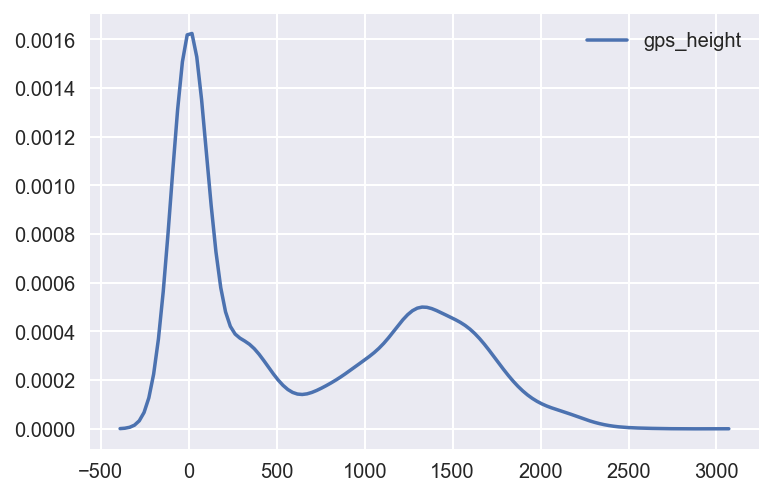

In [12]:
kde_plot(df, variable = 'amount_tsh', bw = 1000, lower = 0)
kde_plot(df, variable = 'construction_year', bw = 1, lower = 1000, upper = 2016)
kde_plot(df, variable = 'gps_height', bw = 100)

### No more copy-pasta between notebooks 

Have a method that gets used in multiple notebooks? Refactor it into a separate `.py` file so it can live a happy life! Note: In order to import your local modules, you must do three things:

 - put the .py file in a separate folder.
 - add an empty `__init__.py` file to the folder so the folder can be recognized as a package.
 - add that folder to the Python path with `sys.path.append`.

In [13]:
# add local python functions
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join('..', 'src')
sys.path.append(src_dir)

In [14]:
# import my method from the source code,
# which drops rows with 0 in them
from features.build_features import remove_invalid_data

df = remove_invalid_data(pump_data_path)
df.shape

(11910, 39)

Jupyter notebook is smart about importing methods. Hence, after importing the method for the first time it will use that version, even if we were to change it afterwards. To overcome this "issue" we can use a jupyter notebook extension to tell it to reload the method every time it changes.

In [15]:
# Load the "autoreload" extension
# it comes with jupyter notebook
%load_ext autoreload

# always reload all modules
%autoreload 2

# or we can reload modules marked with "%aimport"
# import my method from the source code

# %autoreload 1
# %aimport features.build_features

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### I'm too good! Now this code is useful to other projects!

Importing local code is great if you want to use it in multiple notebooks, but once you want to use the code in multiple projects or repositories, it gets complicated. This is when we get serious about isolation!

We can build a python package to solve that! In fact, there is a [cookiecutter to create Python packages](https://github.com/wdm0006/cookiecutter-pipproject).

Once we create this package, we can install it in "editable" mode, which means that as we change the code the changes will get picked up if the package is used. The process looks like

```bash
# install cookiecutter first
pip install cookiecutter

cookiecutter https://github.com/wdm0006/cookiecutter-pipproject
cd package_name
pip install -e .
```
    
Now we can have a separate repository for this code and it can be used across projects without having to maintain code in multiple places.

## Section 3  Don't let others break your toys

Include tests.

###  numpy.testing

Provides useful assertion methods for values that are numerically close and for numpy arrays.

In [16]:
# the randomly generated data from the normal distribution with a mean of 1
# should have a mean that's almost equal to 0, hence no error occurs
import numpy as np
data = np.random.normal(0.0, 1.0, 1000000)
np.testing.assert_almost_equal(np.mean(data), 0.0, decimal = 2)

Also check the docs for [numpy.isclose](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.isclose.html) and [numpy.allclose](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.allclose.html#numpy.allclose). When making assertions about data, especially where small probabilistic changes or machine precision may result in numbers that aren't **exactly** equal. Consider using this instead of == for numbers involved in anything where randomness may influence the results

### [engarde](https://github.com/TomAugspurger/engarde) decorators

A library that lets you practice defensive program -- specifically with pandas `DataFrame` objects. It provides a set of decorators that check the return value of any function that returns a `DataFrame` and confirms that it conforms to the rules.

In [17]:
# pip install engarde
import engarde.decorators as ed

In [18]:
test_data = pd.DataFrame({'a': np.random.normal(0, 1, 100),
                          'b': np.random.normal(0, 1, 100)})
@ed.none_missing()
def process(dataframe):
    dataframe.loc[10, 'a'] = 1 # change the 1 to np.nan and the code assertion will break
    return dataframe

process(test_data).head()

,a,b
0,0.441135,0.141190
1,0.623727,-1.305111
2,-0.219630,1.196490
3,-0.196579,-0.632091
4,0.117169,1.030495


`engarde` has an awesome set of decorators:

- `none_missing` - no NaNs (great for machine learning--sklearn does not care for NaNs)
- `has_dtypes` - make sure the dtypes are what you expect
- `verify` - runs an arbitrary function on the dataframe
- `verify_all` - makes sure every element returns true for a given function

More can be found [in the docs](http://engarde.readthedocs.org/en/latest/api.html).

### Creating a test suite with pytest

Creating a test suite with [pytest](http://pytest.org/latest/) to start checking the functions we've 
written. To pytest `test_` prefixed test functions or methods are test items. For more info, check the [getting started guide](http://docs.pytest.org/en/latest/getting-started.html).

The term "[test fixtures](https://en.wikipedia.org/wiki/Test_fixture#Software)" refers to known objects or mock data used to put other pieces of the system to the the test. We want these to have the same, known state every time.

For those familiar with [`unittest`](https://github.com/ethen8181/machine-learning/blob/master/python/test.py), this might be data that you read in as part of the `setUp` method. `pytest` does things a bit differently; you define functions that return expected fixtures, and use a special decorator so that your tests automatically get passed the fixture data when you add the fixture function name as an argument.

We need to set up a way to get some data in here for testing. There are two basic choices &mdash; **reading in the actual data or a known subset of it**, or **making up some smaller, fake data**. You can choose whatever you think works best for your project.

Remove the failing test from above and copy the following into your testing file:

In [19]:
import pytest
import pandas as pd

@pytest.fixture()
def df():
    """read in the raw data file and return the dataframe"""
    pump_data_path = os.path.join('..', 'data', 'raw', 'pumps_train_values.csv')
    df = pd.read_csv(pump_data_path)
    return df


def test_df_fixture(df):
    assert df.shape == (59400, 40)

    useful_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region',
                      'population', 'construction_year', 'extraction_type_class',
                      'management_group', 'quality_group', 'source_type',
                      'waterpoint_type', 'status_group']
    
    for column in useful_columns:
        assert column in df.columns

When can then run `py.test` from the command line, where the testing code resides.

## Other best practices

- Use version control such as github! Except for big data file where you might turn to other cloud database, s3, etc. If you are in fact using github, you might also be interested in the [nbdime](http://nbdime.readthedocs.io/en/latest/) (diffing and merging of Jupyter Notebooks) project. It makes checking jupyter notebook changes so much easier
- Use [logging](http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/python/logging.ipynb) to record to process instead of printing
- Issue tracking (keep track of the bugs). A minimal useful bug database should include:
    - The observed behavior. Complete steps to reproduce the bug
    - The expected behavior
    - Who is it assigned to
    - Whether it has been fixed or not
- Establish the workflow before diving into the project. This includes using a unified file structure for the project, e.g. [cookiecutter-data-science](https://github.com/drivendata/cookiecutter-data-science)

# Reference

- [Github: Data Science is Software | SciPy 2016 Tutorial](https://github.com/drivendata/data-science-is-software)
- [Youtube: Data Science is Software | SciPy 2016 Tutorial](https://www.youtube.com/watch?v=EKUy0TSLg04&index=2&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6)
- [An Introduction to Semantic Versioning](https://learningd3.com/blog/d3-versioning/)